In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# *Circuitos Elétricos I - Semana 11*

### A integral de Laplace

Seja $f(t)$ uma função definida no intervalo $0\leq t \leq \infty$, com $t$ e $f(t)$ reais, então a função $F(s)$, definida pela integral de Laplace

$$\large
\begin{equation}
F(s)=\mathcal{L}\{f(t)\}=\int_{0}^{\infty} f(t) e^{-s t} dt,\;\; s \in \mathbb{C},
\end{equation}
$$

é conhecida como a transformada de Laplace de $f(t)$.

Para informações sobre como utilizar o Sympy para o cálculo da transformada de Laplace:

https://dynamics-and-control.readthedocs.io/en/latest/1_Dynamics/3_Linear_systems/Laplace%20transforms.html

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from utils import round_expr, symdisp, symplot

from sympy.polys.partfrac import apart

# temp workaround
import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings('ignore', category=MatplotlibDeprecationWarning)

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = False

In [3]:
# transformada de Laplace
def L(f,t,s):
    return sp.laplace_transform(f, t, s, noconds=True)

# transformada inversa de Laplace
def invL(F,s,t):
    return sp.re(sp.inverse_laplace_transform(F, s, t, noconds=True))

# funções para auxílio na expansão em frações parciais
def adjustCoeff(expr):    
    coeff = expr.as_numer_denom()
    c0 = sp.poly(coeff[1].cancel()).coeffs()[0]
    
    return (coeff[0].cancel()/c0)/(coeff[1].cancel()/c0)

def partFrac(expr, Ndigits):
    expr = expr.cancel()
    expr = apart(adjustCoeff(expr), s, full=True).doit()
    
    return sp.N(expr, Ndigits)

sp.init_printing()

#### Definindo algumas variáveis simbólicas de interesse

In [4]:
t, s  = sp.symbols('t, s')
a     = sp.symbols('a', real=True, positive=True)
omega = sp.symbols('omega', real=True)

## Gere sua tabela de transformadas

In [5]:
func = [1,
         t,
         sp.exp(-a*t),
         t*sp.exp(-a*t),
         t**2*sp.exp(-a*t),
         sp.sin(omega*t),
         sp.cos(omega*t),
         1 - sp.exp(-a*t),
         sp.exp(-a*t)*sp.sin(omega*t),
         sp.exp(-a*t)*sp.cos(omega*t),
         ]
func

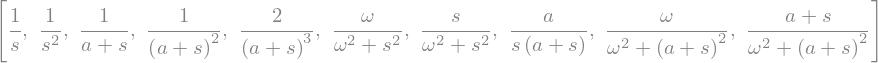

In [6]:
Fs = [L(f,t,s) for f in func]
Fs

### Problema 1

Não existe nenhuma energia armazenada no circuito da figura a seguir no momento em que a fonte de corrente é ligada.

<img src="./figures/J14C1.png" width="500">

a. Determine $I_a(s)$ e $I_b(s)$.\
b. Determine $i_a(t)$ e $i_b(t)$.\
c. Determine $V_a(s)$, $V_b(s)$ e $V_c(s)$.\
d. Determine $v_a(t)$, $v_b(t)$ e $v_c(t)$.

<img src="./figures/J14C2.png" width="500">

a. Determinando $I_a(s)$ e $I_b(s)$:

In [7]:
I2, I3, s = sp.symbols('I2, I3, s')

# define os sistema de equações
eq1 = sp.Eq((4 + s)*I2 - 2*I3, 4)             
eq2 = sp.Eq(-2*s*I2 + s*(4 + s)*I3, 8)  

# resolve o sistema
soluc = sp.solve([eq1, eq2],[I2, I3], dict=True)
soluc

I2 = [sol[I2] for sol in soluc]
I3 = [sol[I3] for sol in soluc]

I1 = 4/s
I2 = I2[0]
I3 = I3[0]

print('Correntes de malha no domínio de Laplace: \n')
symdisp('I_1(s) =', I1, 'As')
symdisp('I_2(s) =', I2, 'As')
symdisp('I_3(s) =', I3, 'As')

Correntes de malha no domínio de Laplace: 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
# Calculando Ia
Ia = I1-I2
Ia = Ia.simplify()

symdisp('I_a(s) =', Ia, 'As')

<IPython.core.display.Math object>

In [9]:
# Calculando Ib
Ib = I2

symdisp('I_b(s) =', Ib.simplify(), 'As')

<IPython.core.display.Math object>

b. Determinando $i_a(t)$ e $i_b(t)$

In [10]:
symdisp('I_a(s) =', Ia.apart(), 'As')

<IPython.core.display.Math object>

In [11]:
t = sp.symbols('t',real=True)

ia = invL(Ia.apart(),s,t)

symdisp('i_a(t) =', ia, 'A')

<IPython.core.display.Math object>

In [12]:
symdisp('I_b(s) =', Ib.apart(), 'As')

<IPython.core.display.Math object>

In [13]:
ib = invL(Ib,s,t)

symdisp('i_b(t) =', ib, 'A')

<IPython.core.display.Math object>

c. Determinando $V_a(s)$, $V_b(s)$ e $V_c(s)$.

In [14]:
Va = (100/s)*I2
Vb = (100/s)*(I3-I2)
Vc = (100/s)*(I1-I3)

symdisp('V_a(s) =', Va.simplify(), 'Vs')
symdisp('V_b(s) =', Vb.simplify(), 'Vs')
symdisp('V_c(s) =', Vc.simplify(), 'Vs')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [15]:
symdisp('V_a(s) =', Va.apart(), 'Vs')

<IPython.core.display.Math object>

In [16]:
symdisp('V_b(s) =', Vb.apart(), 'Vs')

<IPython.core.display.Math object>

In [17]:
symdisp('V_c(s) =', Vc.apart(), 'Vs')

<IPython.core.display.Math object>

d. Determinando $v_a(t)$, $v_b(t)$ e $v_c(t)$.

In [18]:
va = ((-400/9)*sp.exp(-6*t) + (400/9) + (400/3)*t)*sp.Heaviside(t)

symdisp('v_a(t) =', round_expr(va,2), 'V')

<IPython.core.display.Math object>

In [19]:
vb = ((800/9)*sp.exp(-6*t) - (800/9) + (400/3)*t)*sp.Heaviside(t)

symdisp('v_b(t) =', round_expr(vb,2), 'V')

<IPython.core.display.Math object>

In [20]:
vc = va

symdisp('v_c(t) =', round_expr(vc,2), 'V')

<IPython.core.display.Math object>

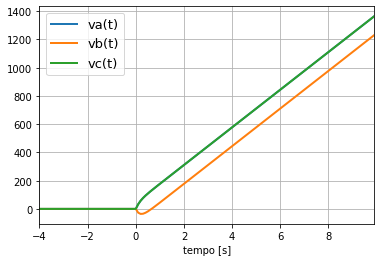

In [21]:
# plota funções no domínio do tempo
intervalo = np.arange(-4, 10, 0.1)
symplot(t, [va, vb, vc], intervalo, ['va(t)','vb(t)','vc(t)'])

Pergunta: estas soluções fazem sentido para o circuito analisado?

### Problema 2

Não existe nenhuma energia armazenada no circuito da figura a seguir no momento em que a fonte de tensão é conectada.

<img src="./figures/J14C3.png" width="600">

a. Determine $V_0(s)$.\
b. Determine $v_0(t)$.

<img src="./figures/J14C4.png" width="600">

In [22]:
Ia, Ib, s = sp.symbols('Ia, Ib, s')

# define o sistema de equações
eq1 = sp.Eq(10*Ia + (s + 250/s)*Ib, 35/s)             
eq2 = sp.Eq(Ia - (1 + 0.4*s)*Ib, 0)

# resolve o sistema
soluc = sp.solve([eq1, eq2],[Ia, Ib], dict=True)
soluc

Ia = [sol[Ia] for sol in soluc]
Ib = [sol[Ib] for sol in soluc]

Ia = Ia[0]
Ib = Ib[0]

In [23]:
symdisp('I_a(s) =', Ia.simplify(), 'As')

<IPython.core.display.Math object>

In [24]:
symdisp('I_b(s) =', Ib.simplify(), 'As')

<IPython.core.display.Math object>

In [25]:
V0 = 35/s - 2*Ia

symdisp('V_0(s) =', V0.simplify(), 'Vs')

<IPython.core.display.Math object>

In [26]:
symdisp('V_0(s) =', partFrac(V0, 4), 'Vs')

<IPython.core.display.Math object>

In [27]:
raizes = np.roots([5, 10, 250, 0])
raizes

array([-1.+7.j, -1.-7.j,  0.+0.j])

In [28]:
K    = sp.symbols('K')
σ, ω = sp.symbols('σ, ω', real=True)

j = sp.I

F = K/(s + σ + ω*j) + sp.conjugate(K)/(s + σ - ω*j)

symdisp('F(s) =', F)

<IPython.core.display.Math object>

In [29]:
symdisp('f(t) =', invL(F,s,t))

<IPython.core.display.Math object>

In [30]:
v0 = (35 + sp.exp(-t)*(-5.6*sp.cos(7*t)-1.2*sp.sin(7*t)))*sp.Heaviside(t)

symdisp('v_0(t) =', v0)

<IPython.core.display.Math object>

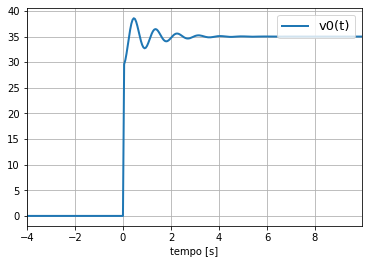

In [31]:
# plota funções no domínio do tempo
intervalo = np.arange(-4, 10, 0.05)
symplot(t, v0, intervalo, 'v0(t)')